# Homework 6

TFCB 2021

Due date: Nov 23, 2021 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using #`tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [22]:
#attempting to install hexbin package, but very unsuccessful
#nstall.packages("hexbin")
#install.packages("hexbin", dependencies=TRUE)
#install.packages("hexbin", type="binary")

ERROR: Error in install.packages("hexbin", type = "binary"): type 'binary' is not supported on this platform


In [24]:
library(tidyverse)
library(stringr)
library(dplyr)
library(ggplot2)
library(gridExtra)
#library(hexbin)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`: is an operator that means "is not" [page for !](https://www.tutorialspoint.com/r/r_operators.htm)
2. `is.na`: function that returns the value of "TRUE" for each data point that is NA[page for is.na](https://www.programmingr.com/tutorial/is-na/)
3. `is.numeric`: this function checks whether a data point can be interpreted as a number [page for is.numeric](https://r-lang.com/as-numeric-r/)
4. `anti_join`: function that returns an output of all the values in dataset #1 that doesn't match up with dataset #2 [page for anti_join](https://www.statology.org/dplyr-anti-join/)
5. `desc`: puts user input in descending order [page for desc](https://dplyr.tidyverse.org/reference/desc.html)
6. `dplyr::slice`: allows user to get specific rows of a dataset by their integer value [page for slice](https://dplyr.tidyverse.org/reference/slice.html)
7. `dplyr::across`: allows user to perform the same operation across multiple columns[page for across](https://www.tidyverse.org/blog/2020/04/dplyr-1-0-0-colwise/)


## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [25]:
#reads txt file and gives it the variable "annotations" and is then piped into select function
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%

  #selects specific rows in txt file and pipes this into filter function
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%

  #looks through ccds_id column and filters anything that is not an "NA" value
  filter(!is.na(ccds_id)) %>%
  
  #prints the output of all the genes with non-NA values
  print()

Warning message:
"One or more parsing issues, see `problems()` for details"
Rows: 19206 Columns: 54

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr  (38): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (4): entrez_id, omim_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 18,808 x 5
   ensembl_gene_id symbol  name             gene_group            ccds_id       
   <chr>           <chr>   <chr>            <chr>                 <chr>         
 1 ENSG00000121410 A1BG    alpha-1-B glyco~ Immunoglobulin like ~ CCDS12976     
 2 ENSG00000148584 A1CF    APOBEC1 complem~ RNA binding motif co~ CCDS7242|CCDS~
 3 ENSG00000175899 A2M     alpha-2-macrogl~ C3 and PZP like, alp~ CCDS44827     
 4 ENSG00000166535 A2ML1   alpha-2-macrogl~ C3 and PZP like, alp~ CCDS73439|CCD~
 5 ENSG00000184389 A3GALT2 alpha 1,3-galac~ Glycosyltransferase ~ CCDS60080     
 6 ENSG00000128274 A4GALT  alpha 1,4-galac~ Alpha 1,4-glycosyltr~ CCDS14041     
 7 ENSG00000118017 A4GNT   alpha-1,4-N-ace~ Alpha 1,4-glycosyltr~ CCDS3097      
 8 ENSG00000094914 AAAS    aladin WD repea~ WD repeat domain con~ CCDS8856|CCDS~
 9 ENSG00000081760 AACS    acetoacetyl-CoA~ Acyl-CoA synthetase ~ CCDS9263      
10 ENSG00000114771 AADAC   arylacetamide d~ Lipases|Arylacetamid~ CCDS33877     
# ...

In [26]:
#reads txt.gz file and gives it the variable "data" and is then piped into rename function
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
  
  #converts "ensembl_gene_id" into "ENSEMBL gene"
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%

  #prints the output of data
  print()

Rows: 63677 Columns: 15

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 63,677 x 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# ... with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 43031 rows containing non-finite values (stat_sum)."
Warning message:
"Removed 43031 rows containing non-finite values (stat_sum)."


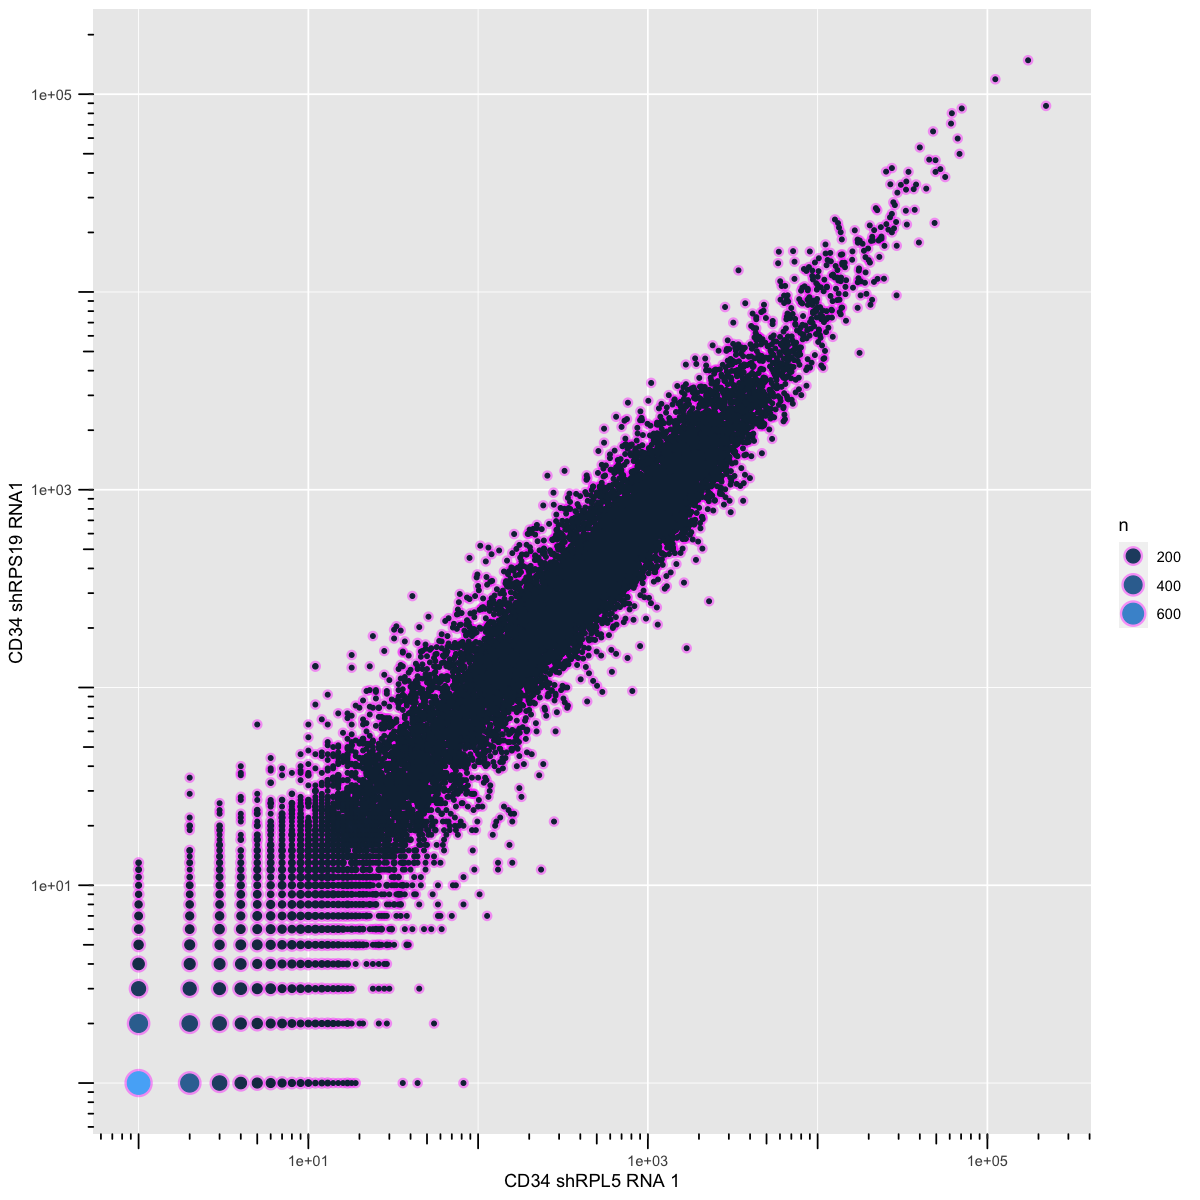

In [42]:
options(repr.plot.width = 10, repr.plot.height = 10)
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  scale_x_log10() +
  scale_y_log10() +
  labs (x= "CD34 shRPL5 RNA 1", y = "CD34 shRPS19 RNA1") +

 #got this from StackOverflow:
  annotation_logticks(short=unit(-0.1, "cm"), mid=unit(-0.2, "cm"), long=unit(-0.3,"cm")) +
  # remove clipping
  coord_cartesian(clip="off") +
  # add space between ticks and labels
  theme(axis.text.x=element_text(margin = margin(t = 10)), axis.text.y=element_text(margin = margin(r = 10))) +

#tried geom_hex(), but I couldn't get the hexbin package to install on VS code, so I used geom_count() instead
 geom_count(alpha = 0.4, shape = 1, stroke = 1.5, color = "magenta") +
 geom_count(aes(color = ..n.., size = ..n..)) +
 guides(color = 'legend')
 
  

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [7]:
#got help from Ichih for regular expression
data <- data %>%
  select(ensembl_gene_id, matches ("(RP(L|S)(5|19)|LUC)"))
   print(data)
 
 #this is the code I had previously: select(ensembl_gene_id, contains("RPL5"), contains("RPS19"), contains ("Luc"))


# A tibble: 63,677 x 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                40                49                 6
 2 ENSG00000000005                 0                 0                 0
 3 ENSG00000000419              1116              1000               101
 4 ENSG00000000457               149               126                14
 5 ENSG00000000460               289               268                52
 6 ENSG00000000938               204               145                17
 7 ENSG00000000971               241               203                45
 8 ENSG00000001036              1487               936               182
 9 ENSG00000001084              1036              1224               134
10 ENSG00000001167               498               557                75
# ... with 63,667 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [8]:
data <- data %>%
  
  #found this on [dplyr reference page](https://dplyr.tidyverse.org/reference/filter_all.html)
  filter_all(all_vars(.> 50))
  print(data)

# A tibble: 4,185 x 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419              1116              1000               101
 2 ENSG00000001036              1487               936               182
 3 ENSG00000001084              1036              1224               134
 4 ENSG00000001497              1436              1231               253
 5 ENSG00000002549              1228              1186               285
 6 ENSG00000002586              2746              1600               260
 7 ENSG00000002834              4346              3800               254
 8 ENSG00000003056              1379              1661               321
 9 ENSG00000003393               832               690                84
10 ENSG00000003402              1836              1382                95
# ... with 4,175 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <db

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [9]:
data <- data %>%
  mutate(across(where(is.numeric), ~.x/median(.x)))
  print(data)

# A tibble: 4,185 x 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419             0.811             0.827             0.612
 2 ENSG00000001036             1.08              0.774             1.10 
 3 ENSG00000001084             0.753             1.01              0.812
 4 ENSG00000001497             1.04              1.02              1.53 
 5 ENSG00000002549             0.892             0.981             1.73 
 6 ENSG00000002586             2.00              1.32              1.58 
 7 ENSG00000002834             3.16              3.14              1.54 
 8 ENSG00000003056             1.00              1.37              1.95 
 9 ENSG00000003393             0.605             0.571             0.509
10 ENSG00000003402             1.33              1.14              0.576
# ... with 4,175 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <db

## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [10]:
lfc <- data %>%

  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) / (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>%

  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) / (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%

  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) / (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%

  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%

  mutate (lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te), lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%
  
  print()

# A tibble: 4,185 x 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.915         1.48          1.08       -0.244
 2 ENSG00000001036        1.16          1.10          1.45       -0.321
 3 ENSG00000001084        1.01          1.13          0.851       0.253
 4 ENSG00000001497        1.38          1.04          1.75       -0.343
 5 ENSG00000002549        1.77          1.85          1.50        0.241
 6 ENSG00000002586        0.898         0.818         1.13       -0.335
 7 ENSG00000002834        0.477         0.391         0.518      -0.120
 8 ENSG00000003056        1.86          1.85          1.02        0.877
 9 ENSG00000003393        0.827         1.19          0.461       0.842
10 ENSG00000003402        0.502         0.424         0.344       0.547
# ... with 4,175 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [11]:
#got help from Jobelle Peralta

mean_lfc <- lfc %>%
mutate(avg_lfc = (lfc_te_rpl5 + lfc_te_rps19)/2) %>%
select(ensembl_gene_id, lfc_te_rpl5, lfc_te_rpl5, avg_lfc) %>%
print()

# A tibble: 4,185 x 3
   ensembl_gene_id lfc_te_rpl5 avg_lfc
   <chr>                 <dbl>   <dbl>
 1 ENSG00000000419      -0.244   0.104
 2 ENSG00000001036      -0.321  -0.362
 3 ENSG00000001084       0.253   0.330
 4 ENSG00000001497      -0.343  -0.549
 5 ENSG00000002549       0.241   0.273
 6 ENSG00000002586      -0.335  -0.403
 7 ENSG00000002834      -0.120  -0.263
 8 ENSG00000003056       0.877   0.873
 9 ENSG00000003393       0.842   1.11 
10 ENSG00000003402       0.547   0.424
# ... with 4,175 more rows



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [12]:
mean_lfc <- mean_lfc %>%
  left_join(annotations, by = "ensembl_gene_id")

  #I tried to do drop_na(), but it didn't work-- sad :(
  #drop_na()

  print(mean_lfc)
  

# A tibble: 4,185 x 7
   ensembl_gene_id lfc_te_rpl5 avg_lfc symbol name     gene_group     ccds_id   
   <chr>                 <dbl>   <dbl> <chr>  <chr>    <chr>          <chr>     
 1 ENSG00000000419      -0.244   0.104 DPM1   dolichy~ Glycosyltrans~ CCDS13434~
 2 ENSG00000001036      -0.321  -0.362 FUCA2  alpha-L~ Alpha-L-fucos~ CCDS5200  
 3 ENSG00000001084       0.253   0.330 GCLC   glutama~ NA             CCDS75471~
 4 ENSG00000001497      -0.343  -0.549 LAS1L  LAS1 li~ Large ribosom~ CCDS55433~
 5 ENSG00000002549       0.241   0.273 LAP3   leucine~ Aminopeptidas~ CCDS3422  
 6 ENSG00000002586      -0.335  -0.403 CD99   CD99 mo~ Blood group a~ CCDS75947~
 7 ENSG00000002834      -0.120  -0.263 LASP1  LIM and~ LIM domain co~ CCDS11331~
 8 ENSG00000003056       0.877   0.873 M6PR   mannose~ MRH domain co~ CCDS73440~
 9 ENSG00000003393       0.842   1.11  ALS2   alsin R~ Dbl family Rh~ CCDS46492~
10 ENSG00000003402       0.547   0.424 CFLAR  CASP8 a~ Receptor liga~ CCDS77505~
# ... 

## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

# A tibble: 10 x 3
   symbol name                                       avg_lfc
   <chr>  <chr>                                        <dbl>
 1 H2AC6  H2A clustered histone 6                      -2.96
 2 H2BC12 H2B clustered histone 12                     -2.80
 3 RPS15  ribosomal protein S15                        -2.28
 4 COX8A  cytochrome c oxidase subunit 8A              -2.03
 5 RPL18A ribosomal protein L18a                       -2.02
 6 RPLP1  ribosomal protein lateral stalk subunit P1   -2.02
 7 H2AX   H2A.X variant histone                        -1.87
 8 RPS26  ribosomal protein S26                        -1.85
 9 APOE   apolipoprotein E                             -1.69
10 RPL7A  ribosomal protein L7a                        -1.69


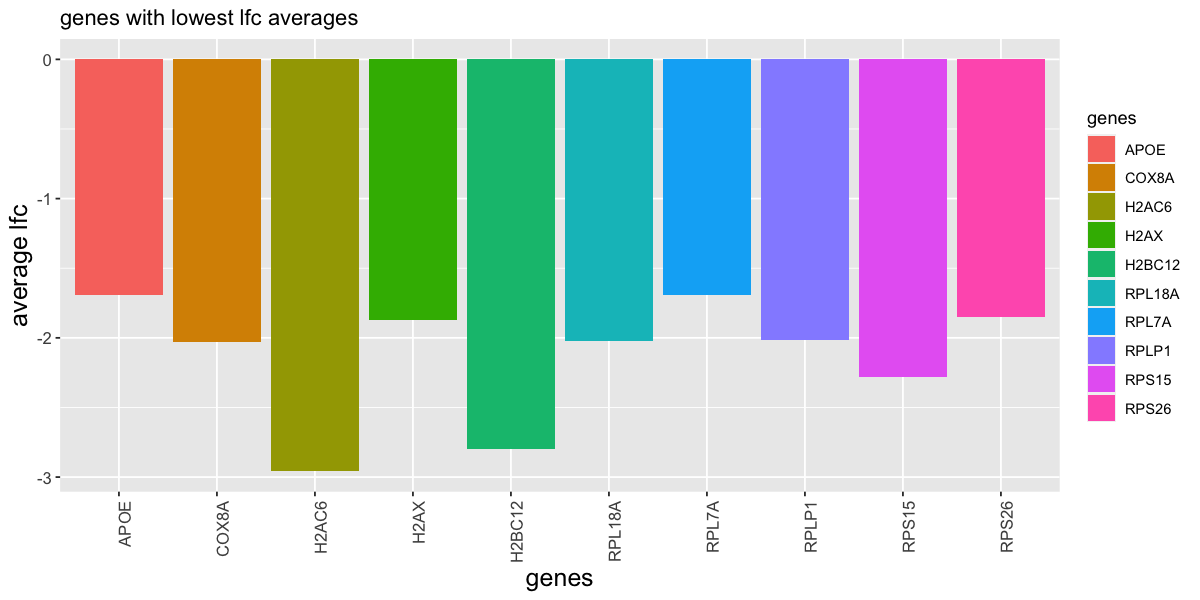

In [430]:
#did this with Jobelle Perlata

options(repr.plot.width = 10, repr.plot.height = 5)

mean_lfc %>%
  arrange(avg_lfc) %>%
  slice_min(avg_lfc, n=10) %>%
  select(symbol, name, avg_lfc) %>%
  print() %>%
    ggplot(aes(x = symbol, y = avg_lfc, fill = symbol)) +
    geom_bar(stat = "identity") +
    labs (x= "genes", y = "average lfc", title = "genes with lowest lfc averages", fill = "genes") +
    theme(axis.text.x = element_text(size = 10, angle = 90, hjust = 1),
        axis.text = element_text(size = 10),
        axis.title = element_text(size = 15))
        axis.legend = element_text(size=10) 
    

#We wanted to get a bar graph of the genes that have the lowest lfc averages
#We first arranged the tibble in ascending order to spit out the lowest lfc averages at the top of the list
#Then, sliced the top 10 lowest lfc averages and selcected for the symbol, averages, and names; eventually plotted!